In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv(r'/Users/PUBG/pubg-finish-placement-prediction/PUBG_data.csv')

In [35]:
pd.set_option('display.max_columns',None)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [36]:
df.shape

(4446966, 29)

In [37]:
df.Id.nunique()

4446966

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [39]:
df.matchId.value_counts()

86e79d9e7f1859    100
662ed63024728f    100
1a02e95b3c0ae6    100
a7eda333f9b106    100
2467370eb7be0c    100
                 ... 
9f2b49358564ea      6
39d2800dad8ae6      6
8aa5066c4b6a79      5
e5a77433bc436f      2
224a123c53e008      1
Name: matchId, Length: 47965, dtype: int64

In [40]:
df.matchId.describe()

count            4446966
unique             47965
top       86e79d9e7f1859
freq                 100
Name: matchId, dtype: object

In [41]:
df.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [42]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [43]:
matchType_Id = pd.DataFrame(df.groupby(['matchType','matchId'])['Id'].agg('count')).reset_index()
FPP_Squad = matchType_Id[matchType_Id['matchType'] == 'squad-fpp']

In [44]:
FPP_Squad.describe()

,Id
count,18576.000000
mean,94.540590
std,5.344032
min,5.000000
25%,93.000000
50%,96.000000
75%,98.000000
max,100.000000


In [45]:
matchType_counts = df.groupby(['matchType','matchId'])['groupId'].agg('count').reset_index()
matchType_counts.groupby('matchType')['groupId'].agg('max')).sort_values(by='groupId',ascending=False.reset_index()

,matchType,groupId
0,crashfpp,100
1,duo,100
2,duo-fpp,100
3,solo,100
4,solo-fpp,100
5,squad,100
6,squad-fpp,100
7,normal-squad,99
8,normal-duo-fpp,98
9,flaretpp,97


In [30]:
#Filter selective match types
match_type = ['solo', 'duo', 'squad', 'solo-fpp', 'duo-fpp', 'squad-fpp','normal-squad-fpp','normal-squad']
df = df[df['matchType'].isin(match_type)]


In [32]:
#For predictions select only squad match types. Confirm whether it is squad
matchType_counts = df.groupby(['matchType','matchId'])['groupId'].agg('count').reset_index()
matchType_counts.groupby('matchType')['groupId'].agg('max')).sort_values(by='groupId',ascending=False.reset_index()

,matchType,groupId
0,duo,100
1,duo-fpp,100
2,solo,100
3,solo-fpp,100
4,squad,100
5,squad-fpp,100
6,normal-squad,99
7,normal-squad-fpp,95


In [14]:
df.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'normal-squad'], dtype=object)

In [15]:
all_stats = pd.DataFrame()

for each_match in match_type:
    temp = matchType_Id[matchType_Id['matchType'] == each_match]
    stats = pd.DataFrame(temp['Id'].describe())
    stats.rename(columns={'Id':each_match},inplace=True)
    all_stats = pd.concat([all_stats,stats],axis=1)

In [17]:
all_stats

,solo,duo,squad,solo-fpp,duo-fpp,squad-fpp,normal-squad-fpp,normal-squad
count,2297.000000,3356.000000,6658.000000,5679.000000,10620.000000,18576.000000,358.000000,16.000000
mean,79.208968,93.441895,94.101232,94.516992,93.850377,94.540590,47.972067,32.250000
std,31.010604,5.923750,5.129182,7.105159,6.333329,5.344032,18.898499,21.221059
min,11.000000,38.000000,18.000000,1.000000,7.000000,5.000000,6.000000,13.000000
25%,88.000000,92.000000,92.000000,94.000000,92.000000,93.000000,31.000000,16.000000
50%,95.000000,95.000000,95.000000,96.000000,95.000000,96.000000,56.000000,29.000000
75%,97.000000,97.000000,97.000000,97.000000,97.000000,98.000000,62.000000,38.250000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,99.000000


In [18]:
#df = df[df['matchType'] == 'squad']

In [19]:
# Check if all the matches belong to classic and of same map. 
df.groupby('matchType')['matchDuration'].agg('max')

matchType
duo                 2204
duo-fpp             2202
normal-squad        1957
normal-squad-fpp    2185
solo                2237
solo-fpp            2199
squad               2218
squad-fpp           2226
Name: matchDuration, dtype: int64

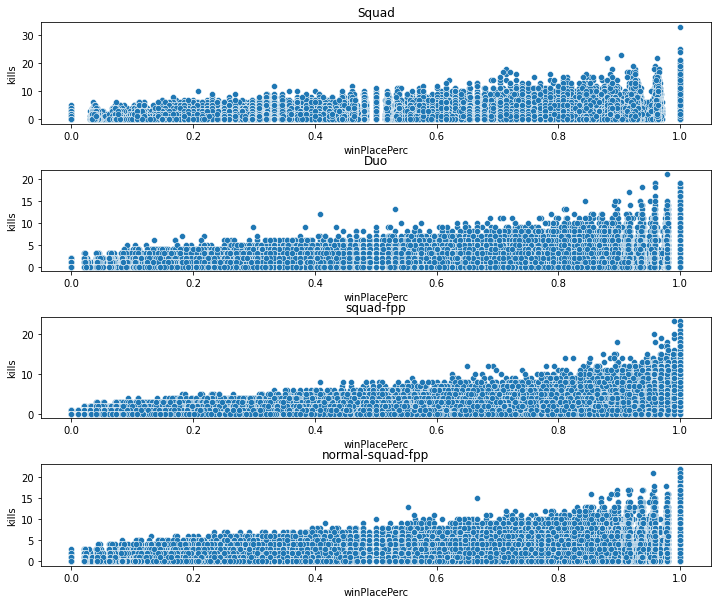

In [20]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,1,figsize=(12,10))

sns.scatterplot(x='winPlacePerc', y ='kills',data = df[df['matchType'] == 'squad'], ax=ax1).set_title("Squad")
sns.scatterplot(x='winPlacePerc', y ='kills', data = df[df['matchType'] == 'duo'], ax=ax2).set_title("Duo")
sns.scatterplot(x='winPlacePerc', y ='kills', data = df[df['matchType'] == 'solo-fpp'], ax=ax3).set_title("squad-fpp")
sns.scatterplot(x='winPlacePerc', y ='kills', data = df[df['matchType'] == 'duo-fpp'], ax=ax4).set_title("normal-squad-fpp")
#plt.subplots_adjust(top=0.8)
plt.subplots_adjust(hspace = 0.45)
plt.show()

In [21]:
X = df.copy()
#X.drop(columns=remove_from_X, inplace=True)
cat_vars = [c for c in X.columns if X.loc[~X[c].isnull(),c].dtype=='object']

ordinal_encoder_train_test = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
X[cat_vars] = ordinal_encoder_train_test.fit_transform(X[cat_vars])

### Correlation
Walk distance: walk distance has the highest impact on win percentile. Let us further check the relation between walk distance and win percentile.

In [22]:
#Correlation matrix

X.drop(columns=['Id']).corr()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
groupId,1.000000,0.000038,0.001091,0.000707,0.000634,0.000859,0.000761,0.000833,-0.001198,0.001376,...,0.000242,0.000167,-0.000389,-0.000046,0.000360,0.000456,-0.000142,0.001406,0.001166,0.000336
matchId,0.000038,1.000000,-0.001667,0.000202,-0.000356,-0.001379,0.000215,-0.000436,-0.000573,0.005931,...,-0.000783,-0.001487,0.000281,0.000486,-0.000430,0.000094,-0.000780,-0.001335,0.005597,0.000222
assists,0.001091,-0.001667,1.000000,0.311660,0.397128,0.302755,0.190601,0.229165,-0.290262,0.039508,...,0.200610,0.111782,0.011631,0.023939,0.005699,0.058256,0.294404,0.227733,0.023828,0.301386
boosts,0.000707,0.000202,0.311660,1.000000,0.530028,0.359913,0.338934,0.536570,-0.555606,0.008330,...,0.253460,0.328984,0.036964,0.108084,0.013091,0.087291,0.640777,0.418389,-0.007824,0.634767
damageDealt,0.000634,-0.000356,0.397128,0.530028,1.000000,0.744544,0.609282,0.345035,-0.683249,0.050416,...,0.260675,0.143205,0.054790,0.037501,0.015233,0.081825,0.404896,0.336340,0.017213,0.444567
DBNOs,0.000859,-0.001379,0.302755,0.359913,0.744544,1.000000,0.474388,0.266084,-0.556790,0.042709,...,0.301056,0.102929,0.036332,0.017412,0.069776,0.060116,0.285589,0.221854,0.011057,0.280350
headshotKills,0.000761,0.000215,0.190601,0.338934,0.609282,0.474388,1.000000,0.200456,-0.472645,0.024028,...,0.151880,0.078179,0.017286,0.028785,0.008605,0.040258,0.254490,0.205265,0.004416,0.279315
heals,0.000833,-0.000436,0.229165,0.536570,0.345035,0.266084,0.200456,1.000000,-0.386400,-0.002722,...,0.237164,0.298129,0.027149,0.079822,0.035421,0.063395,0.431162,0.313168,-0.011337,0.428378
killPlace,-0.001198,-0.000573,-0.290262,-0.555606,-0.683249,-0.556790,-0.472645,-0.386400,1.000000,-0.023366,...,-0.270459,-0.235379,-0.054789,-0.089589,-0.037831,-0.072862,-0.591459,-0.497621,-0.002043,-0.719695
killPoints,0.001376,0.005931,0.039508,0.008330,0.050416,0.042709,0.024028,-0.002722,-0.023366,1.000000,...,0.011863,-0.028500,0.001089,-0.004772,-0.039417,-0.008791,0.004076,-0.005088,0.983468,0.012883


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longestKill', ylabel='Density'>

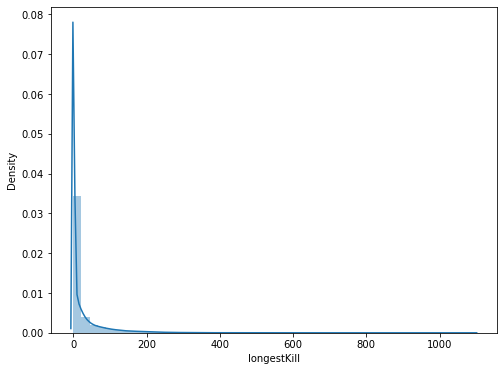

In [23]:
#Check longestKill histogram. As the information says that it may be misleading, as downing a player and driving away may lead to a large longestKill stat.
#check for weapons acquired
plt.subplots(figsize=(8,6))
sns.distplot(df['longestKill'])

In [24]:
df['longestKill'].describe()

count    4.429389e+06
mean     2.298356e+01
std      5.093188e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.131000e+01
max      1.094000e+03
Name: longestKill, dtype: float64

In [25]:
cut_bins = [float('-inf'),200,400,600,800,1000,2000]
cut_labels = ['Below 200','200 to 400','400 to 600','600 to 800','800 to 1000','1000 to 2000']
df['longest_kill_bucket'] = pd.cut(df['longestKill'], bins=cut_bins, labels=cut_labels)



<AxesSubplot:xlabel='longestKill', ylabel='Density'>

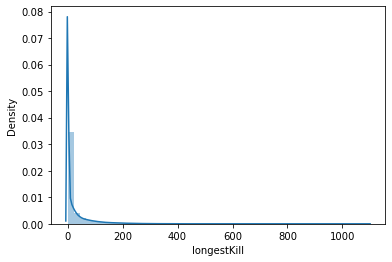

In [242]:
#Identify potential cheaters
sns.distplot(df['longestKill'])

In [252]:
high_kills = df[df['kills'] >= 12]
(high_kills.shape[0]/df.shape[0])*100
#there are 0.10% people who have kills higher than 11.

0.10859288009991447

In [254]:
high_kills[high_kills['damageDealt'] <= 500]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,longest_kill_bucket
3161180,79f554eebd631b,a3b7c153bebdda,6abae63f2c8cd9,3,0,460.9,10,5,4,5,...,0.0,0,0.0,0,0,620.7,19,1500,1.0,Below 200


<AxesSubplot:xlabel='kills', ylabel='damageDealt'>

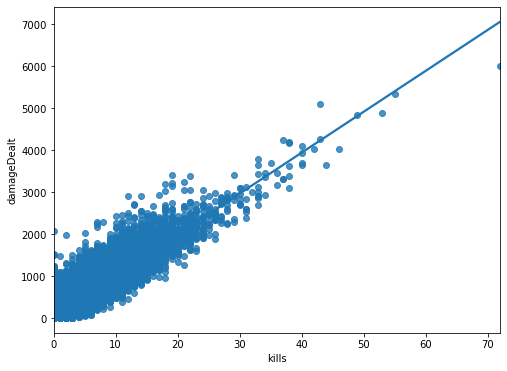

In [258]:
#relation between kills and damage dealt
plt.subplots(figsize=(8,6))
sns.regplot(df['kills'], df['damageDealt'])

<AxesSubplot:xlabel='damageDealt', ylabel='winPlacePerc'>

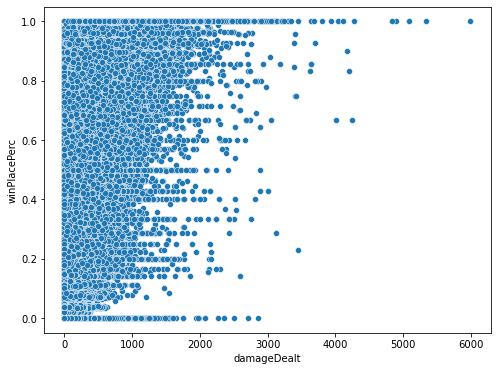

In [260]:
#relation between kills and damage dealt
plt.subplots(figsize=(8,6))
sns.scatterplot(df['damageDealt'], df['winPlacePerc'])

In [26]:
df['longest_kill_bucket'].value_counts()

Below 200       4346509
200 to 400        77609
400 to 600         4508
600 to 800          515
800 to 1000         233
1000 to 2000         15
Name: longest_kill_bucket, dtype: int64

In [27]:
df.groupby('longest_kill_bucket')['winPlacePerc'].agg('mean')*100

longest_kill_bucket
Below 200       46.556780
200 to 400      84.955701
400 to 600      85.969869
600 to 800      84.867379
800 to 1000     80.505150
1000 to 2000    59.192000
Name: winPlacePerc, dtype: float64

In [28]:
df.groupby('longest_kill_bucket')['rideDistance'].agg('mean').round()

longest_kill_bucket
Below 200        576.0
200 to 400      1958.0
400 to 600      2421.0
600 to 800      2465.0
800 to 1000     2373.0
1000 to 2000     256.0
Name: rideDistance, dtype: float64

<AxesSubplot:xlabel='winPlacePerc', ylabel='walkDistance'>

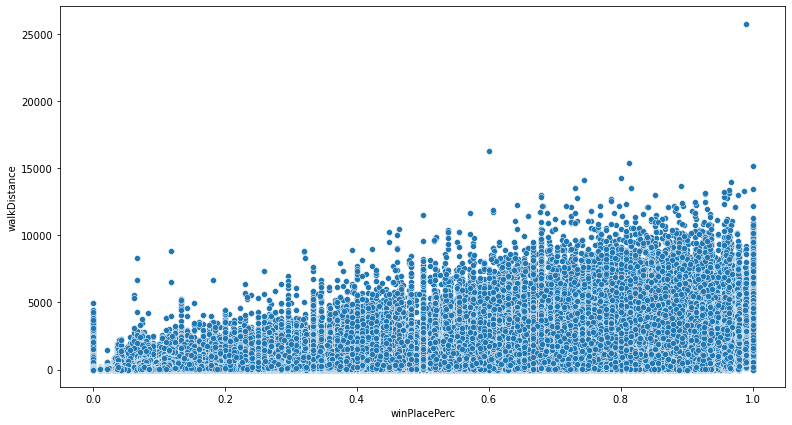

In [29]:
#Check as correlation is high
plt.subplots(figsize=(13,7))
sns.scatterplot(x = df['winPlacePerc'], y = df['walkDistance'])

In [30]:
# remove winpoints, kill points, rank points, kills from correlation
remove_from_X = ['winPlacePerc','winPoints', 'rankPoints', 'killPoints', 'kills','Id', 'groupId', 'matchId','longest_kill_bucket']

In [31]:
df = df.dropna()

### ML Predictions

In [42]:
#### Target Var = Devaluation rate monthly
X = df.copy()
X.drop(columns=remove_from_X, inplace=True)


cat_vars = [c for c in X.columns if X.loc[~X[c].isnull(),c].dtype=='object']

ordinal_encoder_train_test = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
X[cat_vars] = ordinal_encoder_train_test.fit_transform(X[cat_vars])

y = df['winPlacePerc'].copy()

In [101]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429388 entries, 0 to 4446965
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killStreaks      int64  
 8   longestKill      float64
 9   matchDuration    int64  
 10  matchType        float64
 11  maxPlace         int64  
 12  numGroups        int64  
 13  revives          int64  
 14  rideDistance     float64
 15  roadKills        int64  
 16  swimDistance     float64
 17  teamKills        int64  
 18  vehicleDestroys  int64  
 19  walkDistance     float64
 20  weaponsAcquired  int64  
dtypes: float64(6), int64(15)
memory usage: 743.5 MB


In [49]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
        
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [51]:
#def predictions(train,target,model)
results = pd.DataFrame()
all_preds = pd.DataFrame()
all_preds2 = pd.DataFrame()


model_names = ['RF']


models = [
            LinearRegression(),
            RandomForestRegressor(random_state=1,n_estimators = 200)

         ]


for i in range(len(model_names)):
    model = models[i].fit(X_train,y_train)
    pred2 = model.predict(X_train)
    pred = model.predict(X_test)
    #pred = np.exp(pred)
    #pred2 = np.exp(pred2)
 
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    mape = metrics.mean_absolute_percentage_error(y_test,pred).round(2)
    r2_square = metrics.r2_score(y_test, pred).round(2)
    #accuracy = (1-abs(y_test-pred)/y_test).mean()
        
    #Train set
    pred2 = pd.DataFrame(pred2).reset_index()
    pred2.drop(columns='index',inplace=True)
    pred2.rename(columns={0:model_names[0]},inplace=True)
    all_preds2 = pd.concat([all_preds2,pred2],axis=1)
    
    #Test set
    pred = pd.DataFrame(pred).reset_index()
    pred.drop(columns='index',inplace=True)
    pred.rename(columns={0:model_names[i]},inplace=True)                                 
    all_preds = pd.concat([all_preds,pred],axis=1)
    Model_accuracies = pd.DataFrame({'model_name':model_names[i], 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2_Square':r2_square,'MAPE':mape},index = np.arange(1))
    Model_accuracies
    
    results = results.append(Model_accuracies)
    results = results.reset_index(drop=True)
    
results

,model_name,MAE,MSE,RMSE,R2_Square,MAPE
0,RF,0.059505,0.007183,0.084755,0.92,5.354032e+12


In [67]:
importances =  pd.DataFrame(models[0].feature_importances_ , X_train.columns).reset_index()
importances.rename(columns={'index':'Variable',0:'Importance'},inplace=True)
importances = importances.sort_values(by='Importance', ascending = False)
importances = importances.reset_index(drop=True)
importances.head()

,Variable,Importance
0,walkDistance,0.702988
1,killPlace,0.178861
2,matchDuration,0.020181
3,numGroups,0.017601
4,maxPlace,0.013206


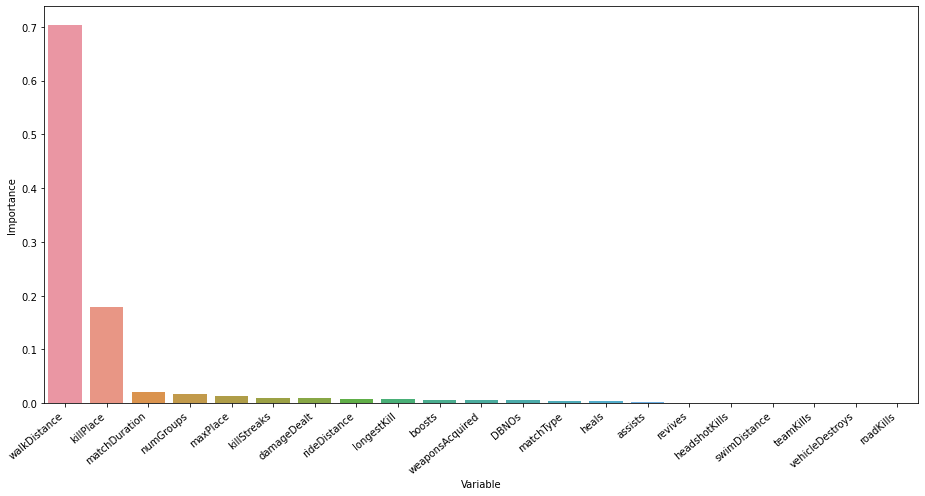

In [79]:
#Varibale importance
plt.subplots(figsize=(13,7))
ax = sns.barplot(x = importances['Variable'], y = importances['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
#ax.savefig("/Users/Keyoor/online_courses/Self projects/PUBG/pubg-finish-placement-prediction/output.png")

In [195]:
def get_deval(org_df,test_set, predictions):
    org_df = org_df.reset_index(drop=True)
    test_set = test_set.reset_index(drop=True)
    predictions = predictions.reset_index(drop=True)
    merged_result = pd.concat([org_df,predictions,test_set],axis=1)
    return merged_result

In [ ]:
train_op = get_deval(X_train,y_train,all_preds2)
test_op = get_deval(X_test,y_test,all_preds)

In [213]:
def get_results(df):  
    df['accuracy_abs'] = (1-((df['winPlacePerc'] - df['RF'])/df['winPlacePerc']).abs())
    df['accuracy'] = ((df['RF'])/df['winPlacePerc'])
    df['abs_error'] = ((df['winPlacePerc'] - df['RF']).abs()/df['winPlacePerc'])
    
    cut_bins = [float('-inf'),60,80,85,90,95,100,105,110,120,float('inf')]
    cut_labels = ['Below 60','60 to 80', '80 to 85','85 to 90', '90 to 95', '95 to 100','100 to 105', '105 to 110', '110 to 120', '120 and Above']
    df['accuracy_broader_bin'] = pd.cut(df['accuracy']*100, bins=cut_bins, labels=cut_labels)
    
    return df

def get_accuracies(df):
    df = df   
    accuracy_10per = df[df['abs_error'] <= 0.10].shape[0]/df.shape[0]*100
    accuracy_15per = df[df['abs_error'] <= 0.15].shape[0]/df.shape[0]*100
    accuracy_20per = df[df['abs_error'] <= 0.20].shape[0]/df.shape[0]*100
    
    return print('Within 10%', accuracy_10per, '\n'
                   #'Within 11%', accuracy_11per, '\n'
                   'Within 15%', accuracy_15per, '\n'
                    'Within 20%', accuracy_20per)
                 

In [214]:
train_acc = get_results(train_op)
test_acc = get_results(test_op)

In [215]:
#number of data points which have +10% and -10% deviation 
print("Train Set Accuracy") 
get_accuracies(train_acc)
print("_______________________________"), '\n'
print("Test Set Accuracy") 
get_accuracies(test_acc)
print("_______________________________") 

Train Set Accuracy
Within 10% 76.37145090602256 
Within 15% 84.26066245050812 
Within 20% 88.05966400546352
_______________________________
Test Set Accuracy
Within 10% 45.25024890560551 
Within 15% 59.299361763132175 
Within 20% 68.48516387132314
_______________________________


In [228]:
test_op = test_op.reset_index() 

In [238]:
pd.pivot_table(test_op, index = 'matchType', columns = 'accuracy_broader_bin', values = 'index', aggfunc={'count'})

count                                                \
accuracy_broader_bin Below 60 60 to 80 80 to 85 85 to 90 90 to 95 95 to 100   
matchType                                                                     
0.0                      1111     3671     2774     4504     7440      8959   
1.0                      3795    12216     8892    15619    24971     31313   
2.0                        21       23        3        7        7         5   
3.0                       335      565      202      192      165       171   
4.0                       274     1368     1231     2476     4378      5855   
5.0                       665     3929     4077     8366    15117     20146   
6.0                      5556    12009     6433     9280    12276     12348   
7.0                     14898    32479    18160    26712    37127     40085   

                                                                     
accuracy_broader_bin 100 to 105 105 to 110 110 to 120 120 and Above  
matchType                                                            
0.0                        7660       6345       7913         11448  
1.0                       26821      20738      23326         29441  
2.0                           5          0          4            35  
3.0                         136        138        197          1269  
4.0                        5435       4416       4847          4428  
5.0                       17999      13476      13196          9316  
6.0                       10112       8490      12043         35736  
7.0                       32870      25857      35376         85204